### Contents
    01. Importing libraries and data
    02. Customer Profiling 
        a. Age grouping
        b. Income Grouping
        c. Dependent Grouping
    03. Unique Variables in Department Column
    04. Time of day breakdown
    05. Additional visualizations and analysis
    06. Exporting Final Data Set & Visualizations

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [2]:
# set path
path=r'C:\Users\niels\Documents\Master Folder - Instacart Basket Analysis 09.10'

In [6]:
# import latest df 
df3 = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'reg_activity_customers.pkl'))

# Customer Profiling 

** The following data manipulations will be using the new df3 data frame that contains only "regular activity customers," which is defined by having >= 5 orders. 

### Age grouping:

   - Age range 1 = Young Adult  >= 18 & <35
   - Age range 2 = Adult >=35 & <60
   - Age range 3 = Senior >= 60

In [7]:
# using .loc to create a profiling variable based on age of customers
df3.loc[(df3['Age'] >= 18) & (df3['Age'] <= 35), 'Age_range'] = '1'
df3.loc[(df3['Age'] > 35) & (df3['Age'] < 60), 'Age_range'] = '2'
df3.loc[(df3['Age'] >= 60), 'Age_range'] = '3'
df3['Age_range'].value_counts()

2    12190079
3    11066290
1     9145606
Name: Age_range, dtype: int64

Most customers are between 36 and 59 years old and fall into the "Adult" age range. 
The Senior age range of older than 60 accounts for the least amount of customers. 

### Income Grouping

   - Less than 50,000 = Low Income
   - Between 50,000 & 120,000 = Middle Income
   - Above 120,000 = High Income

In [9]:
# Create income flags
df3.loc[df3['Income']<50000, 'Income_flag'] = 'Low Income'
df3.loc[(df3['Income']>=50000) & (df3['Income']<=120000), 'Income_flag'] = 'Middle Income' 
df3.loc[df3['Income']>120000, 'Income_flag'] = 'High Income'
df3['Income_flag'].value_counts(dropna = False)

Middle Income    19238403
High Income       9570582
Low Income        3592990
Name: Income_flag, dtype: int64

The majority of customers fall within the Middle Income bracket making between 50,000 and 120,000.

### Dependent Grouping 
 - Customers with 0 dependents = no dependents 
 - Customers with 1 or more dependents = has dependent/s

In [10]:
# Create flag for customers with no dependents
df3.loc[df3['#_of_dependants']== 0, 'Dependent_flag'] = 'No Dependents'
# Create flag for 
df3.loc[df3['#_of_dependants'] > 0, 'Dependent_flag'] = 'Has Dependent/s'

In [11]:
# Check values of column 
df3['Dependent_flag'].value_counts()

Has Dependent/s    24305226
No Dependents       8096749
Name: Dependent_flag, dtype: int64

In [12]:
# aggregate dependent expenditure
df3.groupby('Dependent_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
Dependent_flag                          
Has Dependent/s  11.930997  1.0  99999.0
No Dependents    12.117328  1.0  99999.0

It appears that there isn't much difference between the expenditure of customers with or without dependents. Customers with no dependents spend slightly more on average. 

### Unique Variables in Department Column 

In [13]:
# Import department df
dep=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [15]:
# Create data dictionary for department id
zipped=zip(dep['Unnamed: 0'], dep['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [16]:
# Map  department names to department id in dataframe
df3['department'] = df3['department_id'].map(data_dict)
df3.head()

,Order_id,Customer_id,Order_number,Orders_day_of_week,Order_time_of_day,Days_since_prior_order,Product_id,Add_to_cart_order,Reordered,Product_name,...,#_of_dependants,Marital_status,Income,Region,Total_orders,Activity_flag,Age_range,Income_flag,Dependent_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,South,59,Regular Activity,1,Low Income,Has Dependent/s,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,South,59,Regular Activity,1,Low Income,Has Dependent/s,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,South,59,Regular Activity,1,Low Income,Has Dependent/s,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,South,59,Regular Activity,1,Low Income,Has Dependent/s,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,South,59,Regular Activity,1,Low Income,Has Dependent/s,beverages


In [17]:
# Create subset for customers who have purchased pet products
pet_parents=df3.loc[df3['department']=='pets']

In [26]:
pet_parents.head()

,Order_id,Customer_id,Order_number,Orders_day_of_week,Order_time_of_day,Days_since_prior_order,Product_id,Add_to_cart_order,Reordered,Product_name,...,#_of_dependants,Marital_status,Income,Region,Total_orders,Activity_flag,Age_range,Income_flag,Dependent_flag,department
1495,659764,109,4,2,5,20.0,36273,9,0,Scoopable Scented Clumping Cat Litter,...,1,married,41805,Northeast,69,Regular Activity,3,Low Income,Has Dependent/s,pets
1496,3116901,109,5,0,7,26.0,36273,3,1,Scoopable Scented Clumping Cat Litter,...,1,married,41805,Northeast,69,Regular Activity,3,Low Income,Has Dependent/s,pets
2791,1439283,290,2,6,14,7.0,25860,8,0,Porterhouse Steak Flavor In Meaty Juices Wet D...,...,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,Has Dependent/s,pets
2792,3080196,290,3,6,12,7.0,25860,21,1,Porterhouse Steak Flavor In Meaty Juices Wet D...,...,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,Has Dependent/s,pets
2793,2881272,290,4,6,10,7.0,25860,7,1,Porterhouse Steak Flavor In Meaty Juices Wet D...,...,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,Has Dependent/s,pets


In [29]:
#aggregating for pet parent expenditure
pet_parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
pets        7.889181  1.0  15.0

In [30]:
# Create subset for customers who have purchased baby products
parents=df3.loc[df3['department']=='babies']

In [31]:
parents.head()

,Order_id,Customer_id,Order_number,Orders_day_of_week,Order_time_of_day,Days_since_prior_order,Product_id,Add_to_cart_order,Reordered,Product_name,...,#_of_dependants,Marital_status,Income,Region,Total_orders,Activity_flag,Age_range,Income_flag,Dependent_flag,department
1508,1382150,109,6,1,9,15.0,3858,5,0,2nd Foods Chicken & Gravy,...,1,married,41805,Northeast,69,Regular Activity,3,Low Income,Has Dependent/s,babies
2893,2684151,290,22,6,10,7.0,45309,32,0,Purple Carrot & blueberry Puffs,...,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,Has Dependent/s,babies
3508,2684151,290,22,6,10,7.0,15076,33,0,Graduates Fruit Pick-Ups Diced Apples,...,1,married,55550,Midwest,1590,Regular Activity,1,Middle Income,Has Dependent/s,babies
3982,2332460,420,21,5,17,11.0,14408,1,0,Unflavored Oral Electrolyte Solution,...,2,married,97248,West,123,Regular Activity,1,Middle Income,Has Dependent/s,babies
4030,58188,420,3,6,13,23.0,30161,7,0,"Face, Hand & Baby Wipes Fragrance Free",...,2,married,97248,West,123,Regular Activity,1,Middle Income,Has Dependent/s,babies


In [32]:
#aggregating for parent expenditure
parents.groupby('department').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
department                     
babies      7.638374  1.0  15.0

In [33]:
# checking what department customers spend the most in sales
df3[['prices', 'department']].groupby('department').agg('sum').sort_values(by ='prices', ascending=False)

,prices
department,
dairy eggs,180644624.2
produce,75656922.6
beverages,20641141.2
frozen,17287788.3
pantry,15019386.3
snacks,12344405.5
meat seafood,11550802.4
bakery,9207464.0
deli,8176975.6


Customers spent the most money on dairy and eggs and the least on the department labeled 'other'.

### Time of day breakdown:

   - 12:00 am - 05:59 am = Early morning
   - 06:00 am - 11:59 pm = Morning
   - 12:00 pm - 04:59 pm = Afternoon
   - 05:00 pm - 08:59 pm = Evening
   - 08:59 pm - 11:59 pm = Night

In [36]:
# Create a dataframe that lists just orders without any duplicates 
df_ord = df3.drop_duplicates(subset='Order_id').copy()
df_ord.shape

(3212144, 35)

In [37]:
# Create list of break down of day 
df_ord.loc[(df_ord['Order_time_of_day'] > 0) & (df_ord['Order_time_of_day'] < 6), 'Time_of_day'] = 'Early_morning'
df_ord.loc[(df_ord['Order_time_of_day'] >= 6) & (df_ord['Order_time_of_day'] < 12), 'Time_of_day'] = 'Morning'
df_ord.loc[(df_ord['Order_time_of_day'] >= 12) & (df_ord['Order_time_of_day'] < 17), 'Time_of_day'] = 'Afternoon'
df_ord.loc[(df_ord['Order_time_of_day'] >= 17) & (df_ord['Order_time_of_day'] < 21), 'Time_of_day'] = 'Evening'
df_ord.loc[(df_ord['Order_time_of_day'] >= 21) & (df_ord['Order_time_of_day'] < 24), 'Time_of_day'] = 'Night'
df_ord['Time_of_day'].value_counts()

Afternoon        1303937
Morning          1066187
Evening           614368
Night             168428
Early_morning      37878
Name: Time_of_day, dtype: int64

Most orders are places during the Afternoon between 12:00 pm - 04:59 pm. The slowest time of day is in the Early Morning between 12:00 am - 05:59 am.

# Additional visualizations & analysis

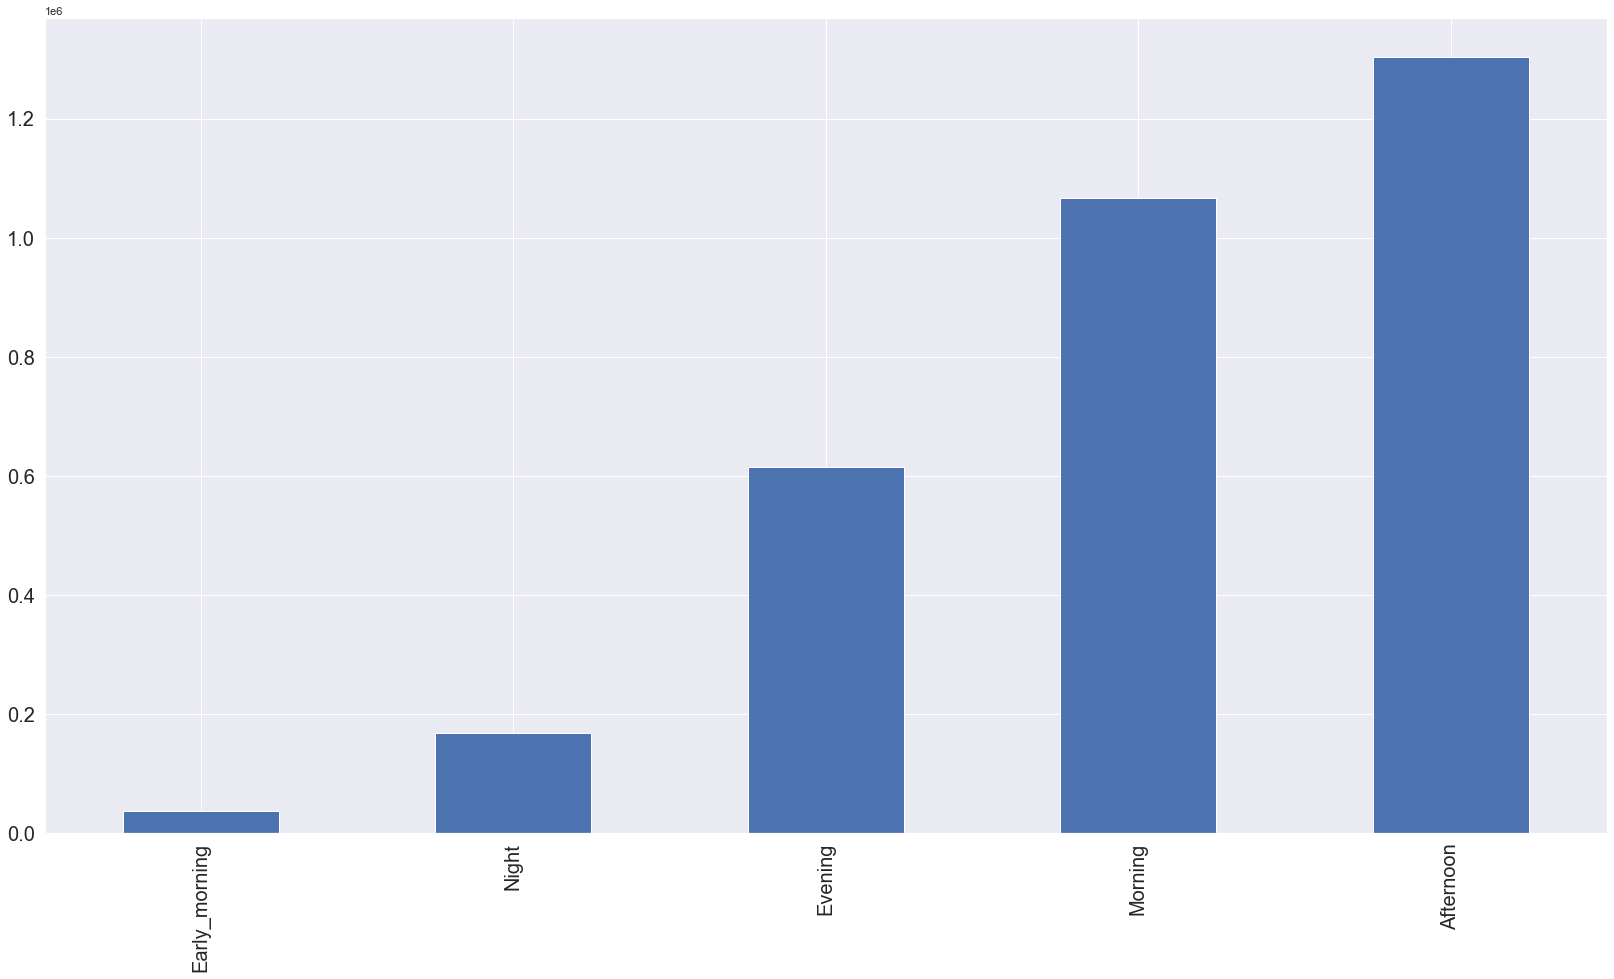

In [99]:
# Create bar graph displaying time of day when most orders are placed 
time_of_day_orders=df_ord['Time_of_day'].value_counts().sort_values().plot.bar(fontsize=20)

The majority of orders are placed in the morning or afternoon hours between 6 am and 4:59 pm. The busiest time is in the Afternoon between 12 pm and 4:59. The slowest time of day is in the early morning between 12 am and 6 am. 

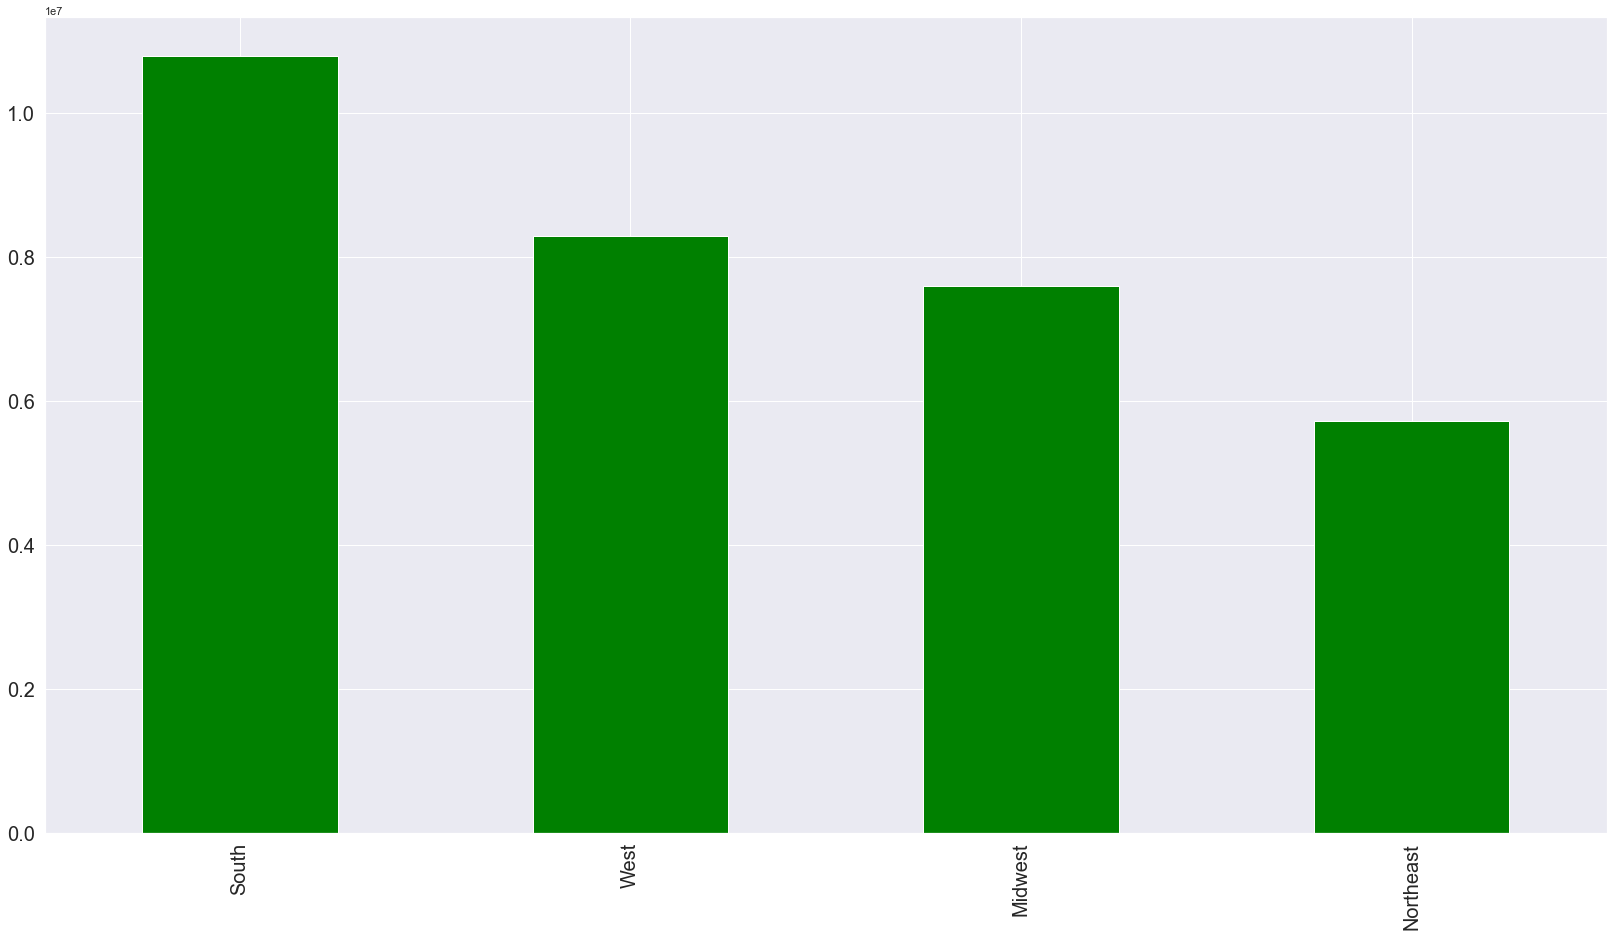

In [43]:
#regional distribution of customers
regional_bar=df3['Region'].value_counts().plot.bar(color='green', fontsize=20)

The South has the most customers and the Northeast has the least. 

In [74]:
# 100% stacked bar chart for regional income distribution 
#creating crosstab for region and income flag

income_region = pd.crosstab(index=df3['Region'], columns=df3['Income_flag'], normalize="index")

#creating cross tab to display labels

income_region_labels = pd.crosstab(index=df3['Region'],columns=df3['Income_flag'])

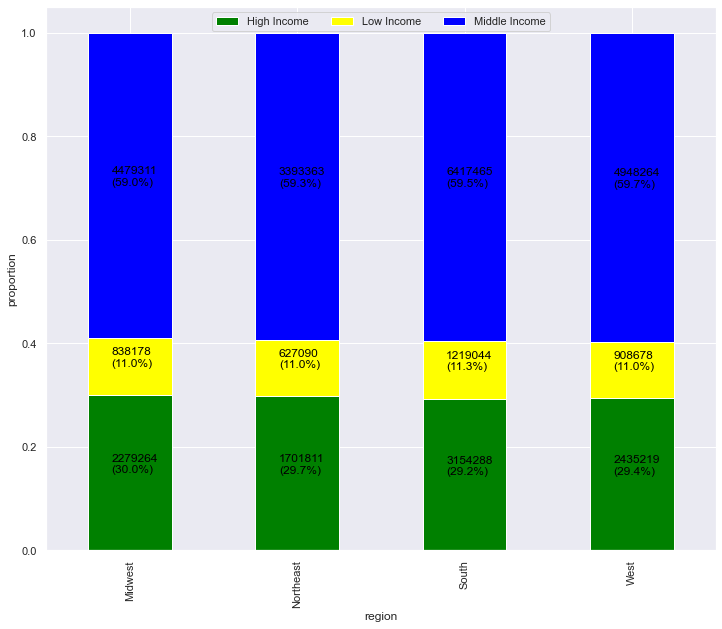

In [76]:
#plotting chart
income_regional_dist=income_region.plot(kind='bar', 
                        stacked=True, 
                        color=['green','yellow','blue'], 
                        figsize=(12,10))

plt.legend(loc="upper center", ncol=4)
plt.ylabel("proportion")
plt.xlabel("region")


for n, y in enumerate([*income_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(income_region.loc[y],
                                         income_region_labels.loc[y],
                                          income_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

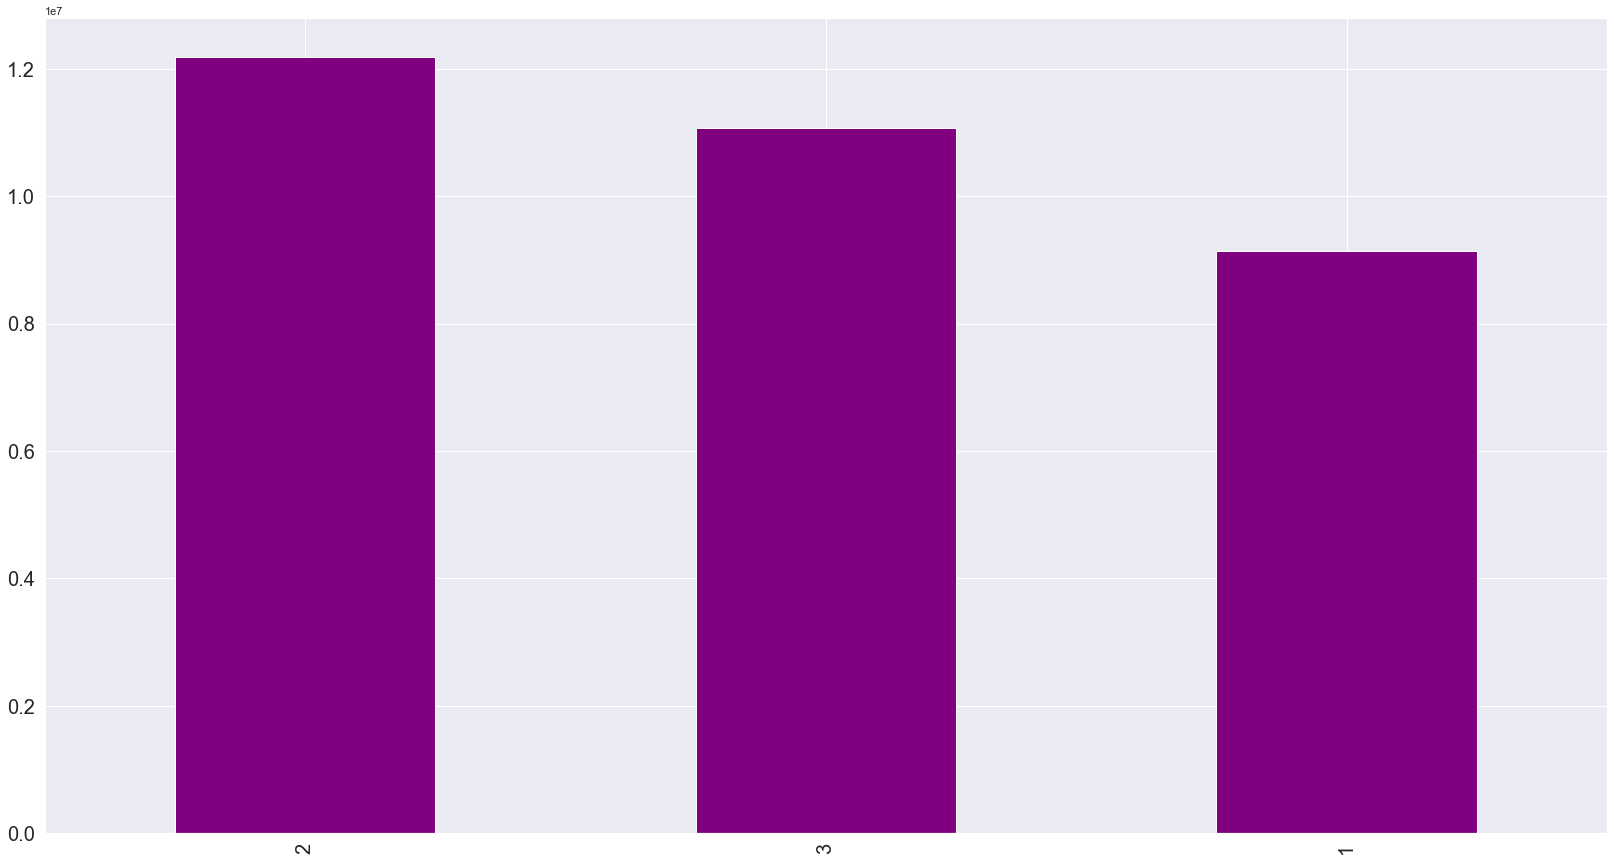

In [46]:
#creating bar chart for orders made by each age group
age_bar=df3['Age_range'].value_counts().plot.bar(color='purple',fontsize=20)

   - Age range 1 = Young Adult  >= 18 & <35
   - Age range 2 = Adult >=35 & <60
   - Age range 3 = Senior >= 60

Most customers are between 36 and 59 years old and fall into the "Adult" age range. 
The Senior age range of older than 60 accounts for the least amount of customers. 

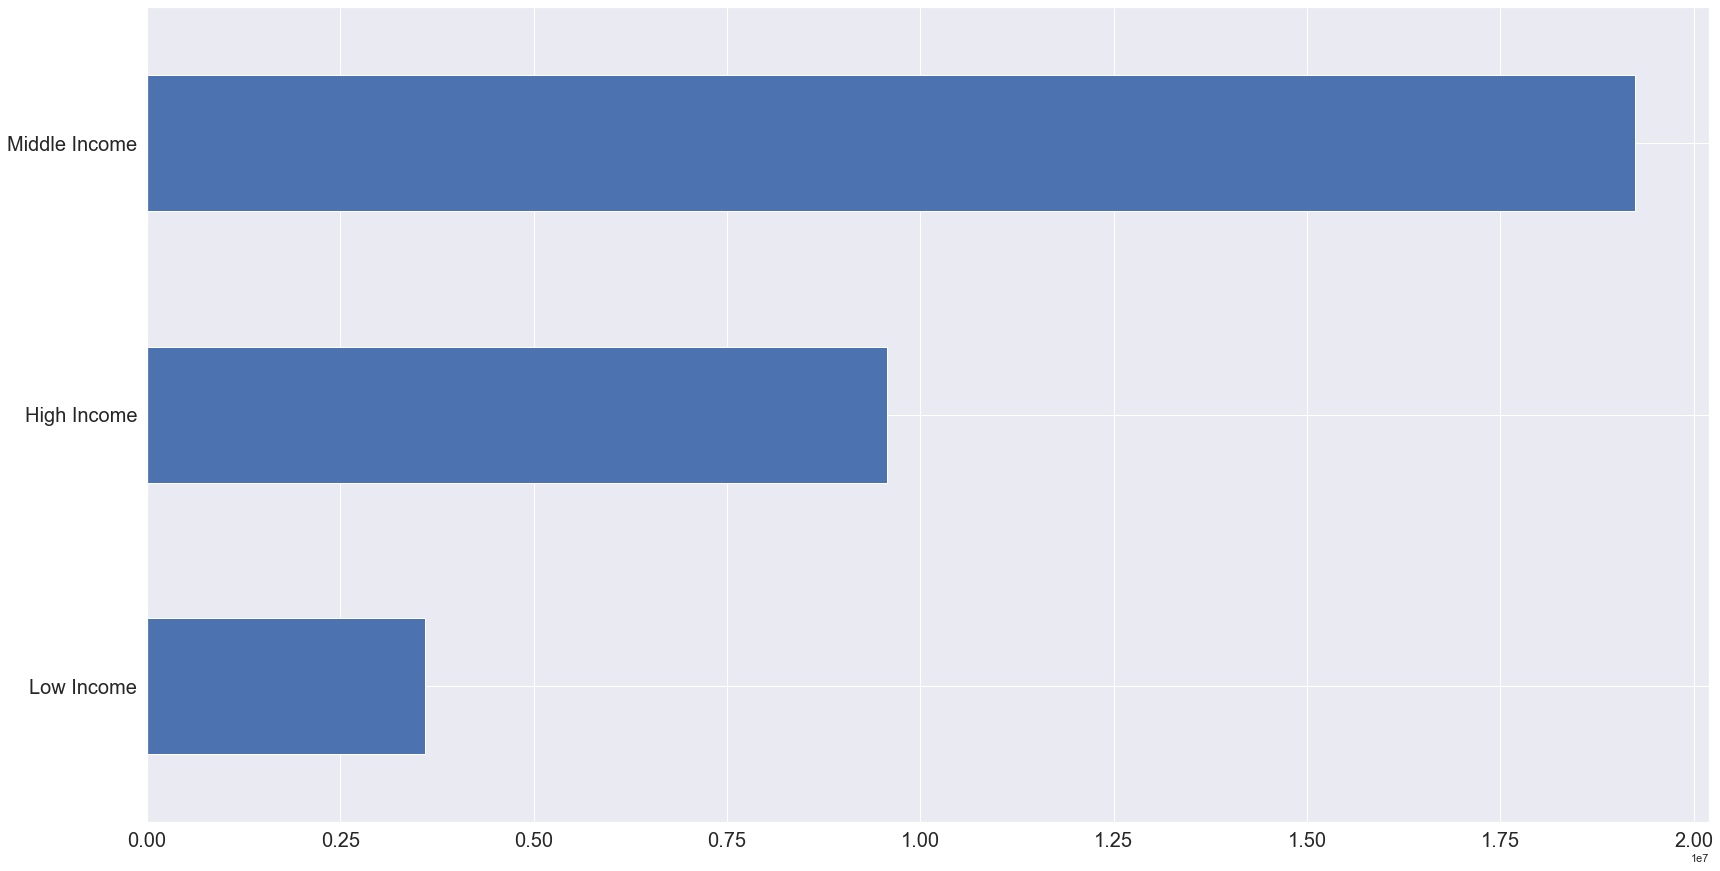

In [48]:
#bar chart for orders made by each income group
income_bar=df3['Income_flag'].value_counts().sort_values().plot.barh(fontsize=20)

   - Less than 50,000 = Low Income
   - Between 50,000 & 120,000 = Middle Income
   - Above 120,000 = High Income

Most customers fall within the middle income bracket. 

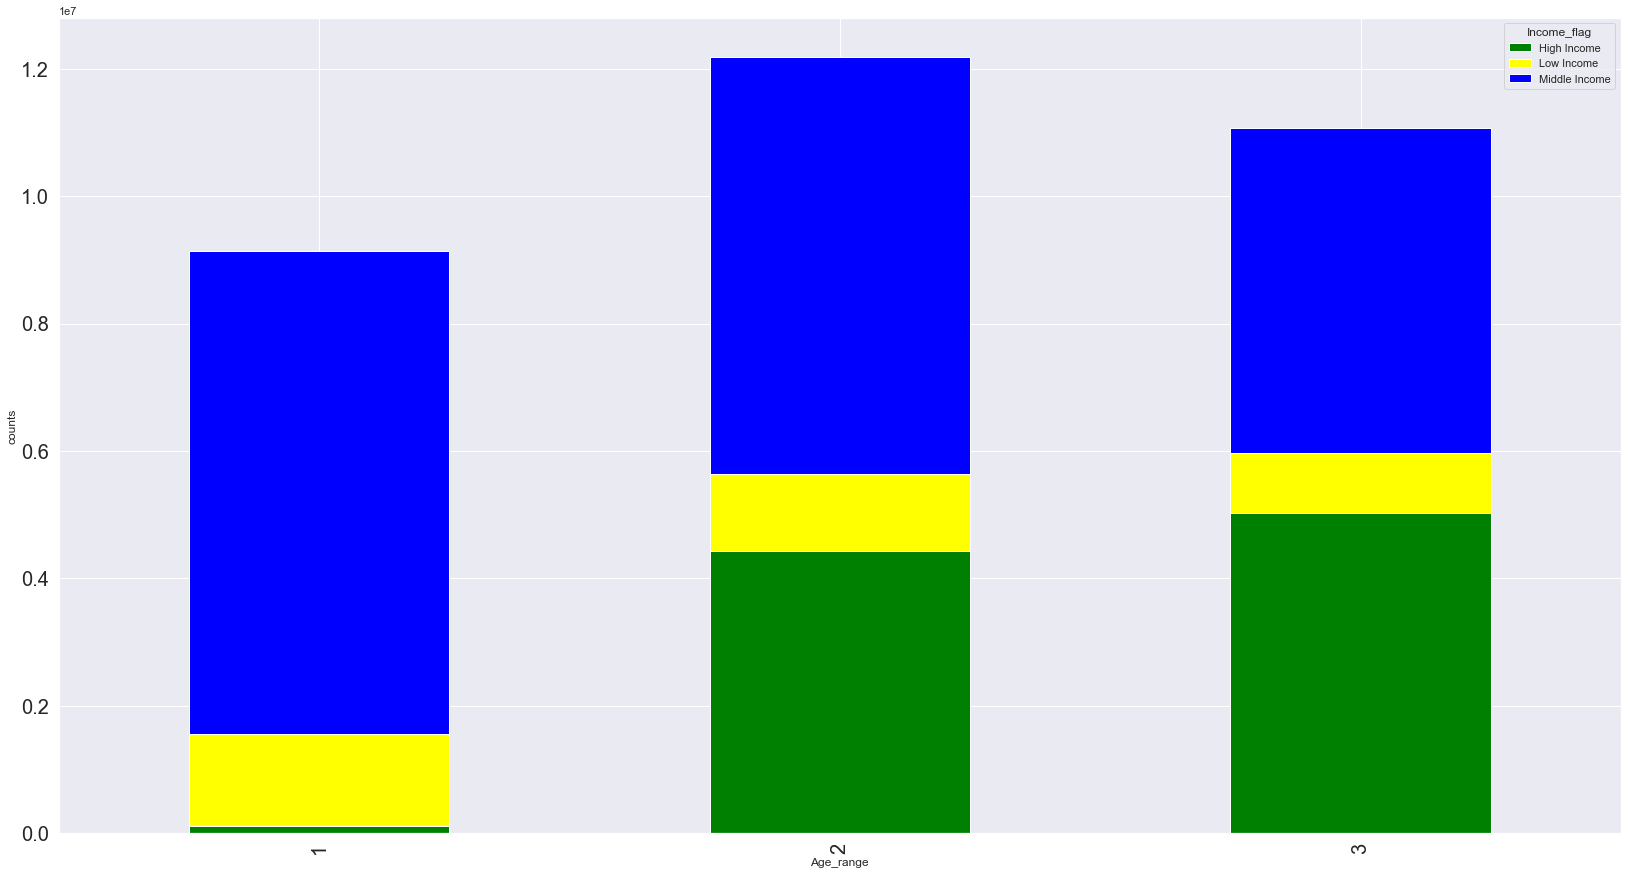

In [71]:
# stacked bar chart for age groups and income groups
age_income_bar=df3.groupby('Age_range')['Income_flag'].value_counts().unstack().plot.bar(stacked=True,
                                                    ylabel='counts',color=['green','yellow','blue'], fontsize=20)

    -Age range 1 = Young Adult >= 18 & <35
    -Age range 2 = Adult >=35 & <60
    -Age range 3 = Senior >= 60

Young Adults have the most middle income customers and the least high income customers. 

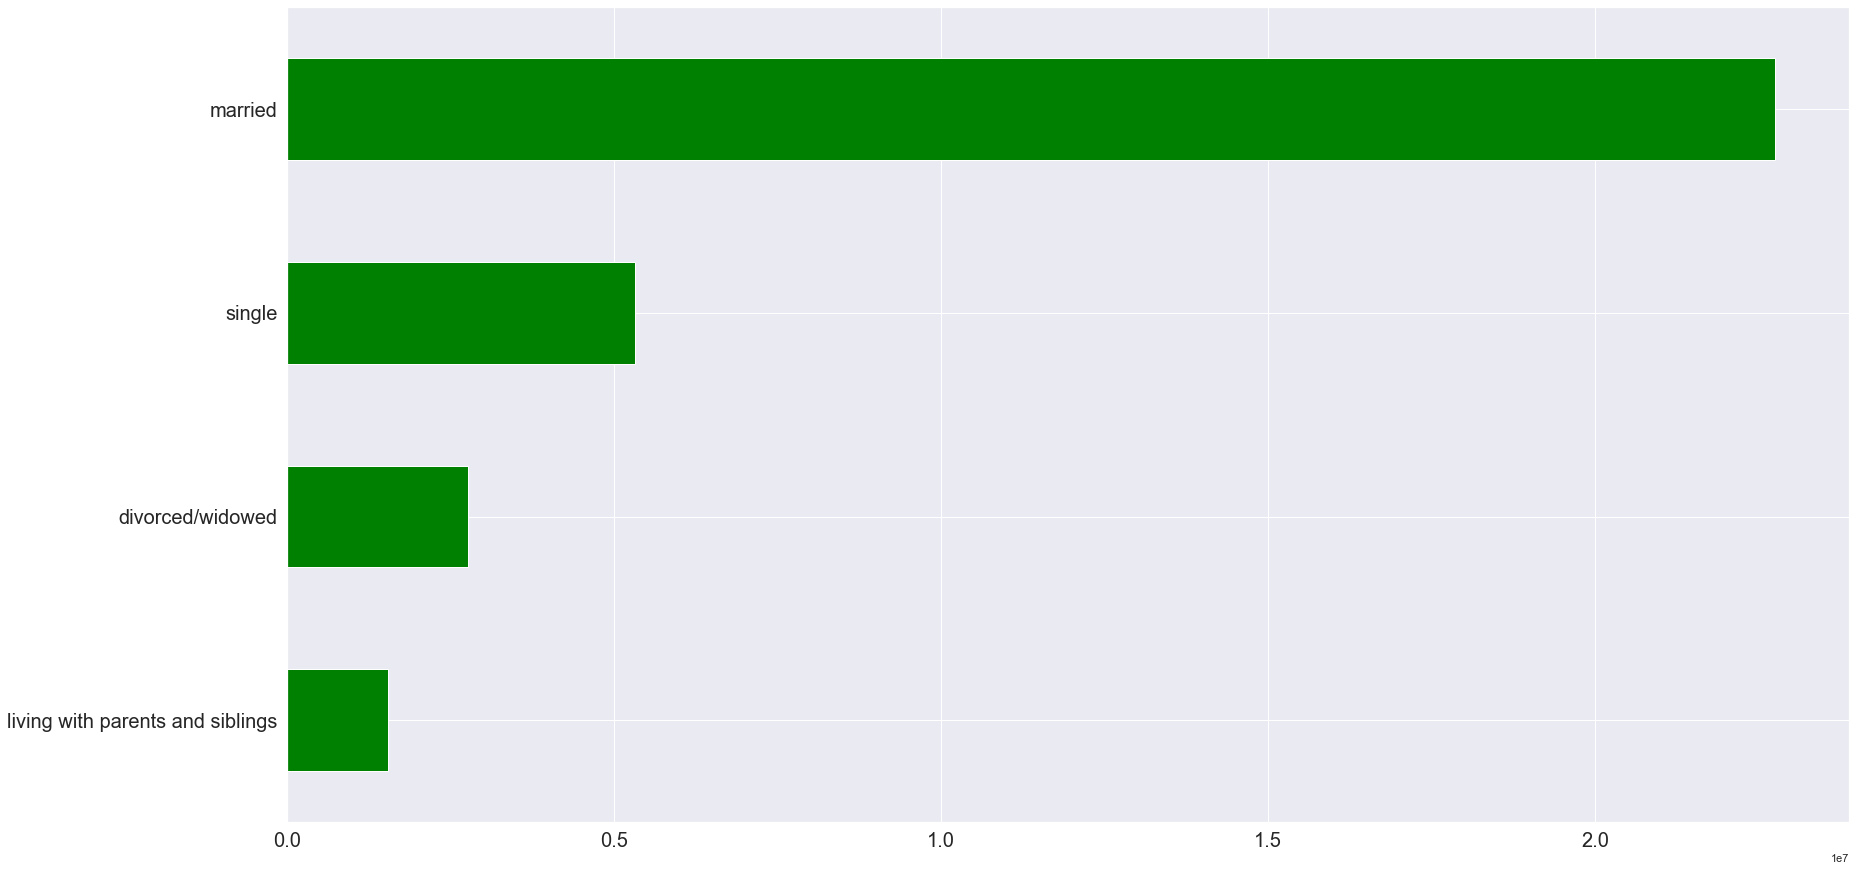

In [50]:
#bar chart showing the orders made by customers of each family status
marital_bar=df3['Marital_status'].value_counts().sort_values().plot.barh(color='green', fontsize=20)

Most purchases are made by customers that are married. The least are made by customers living with parents and siblings.

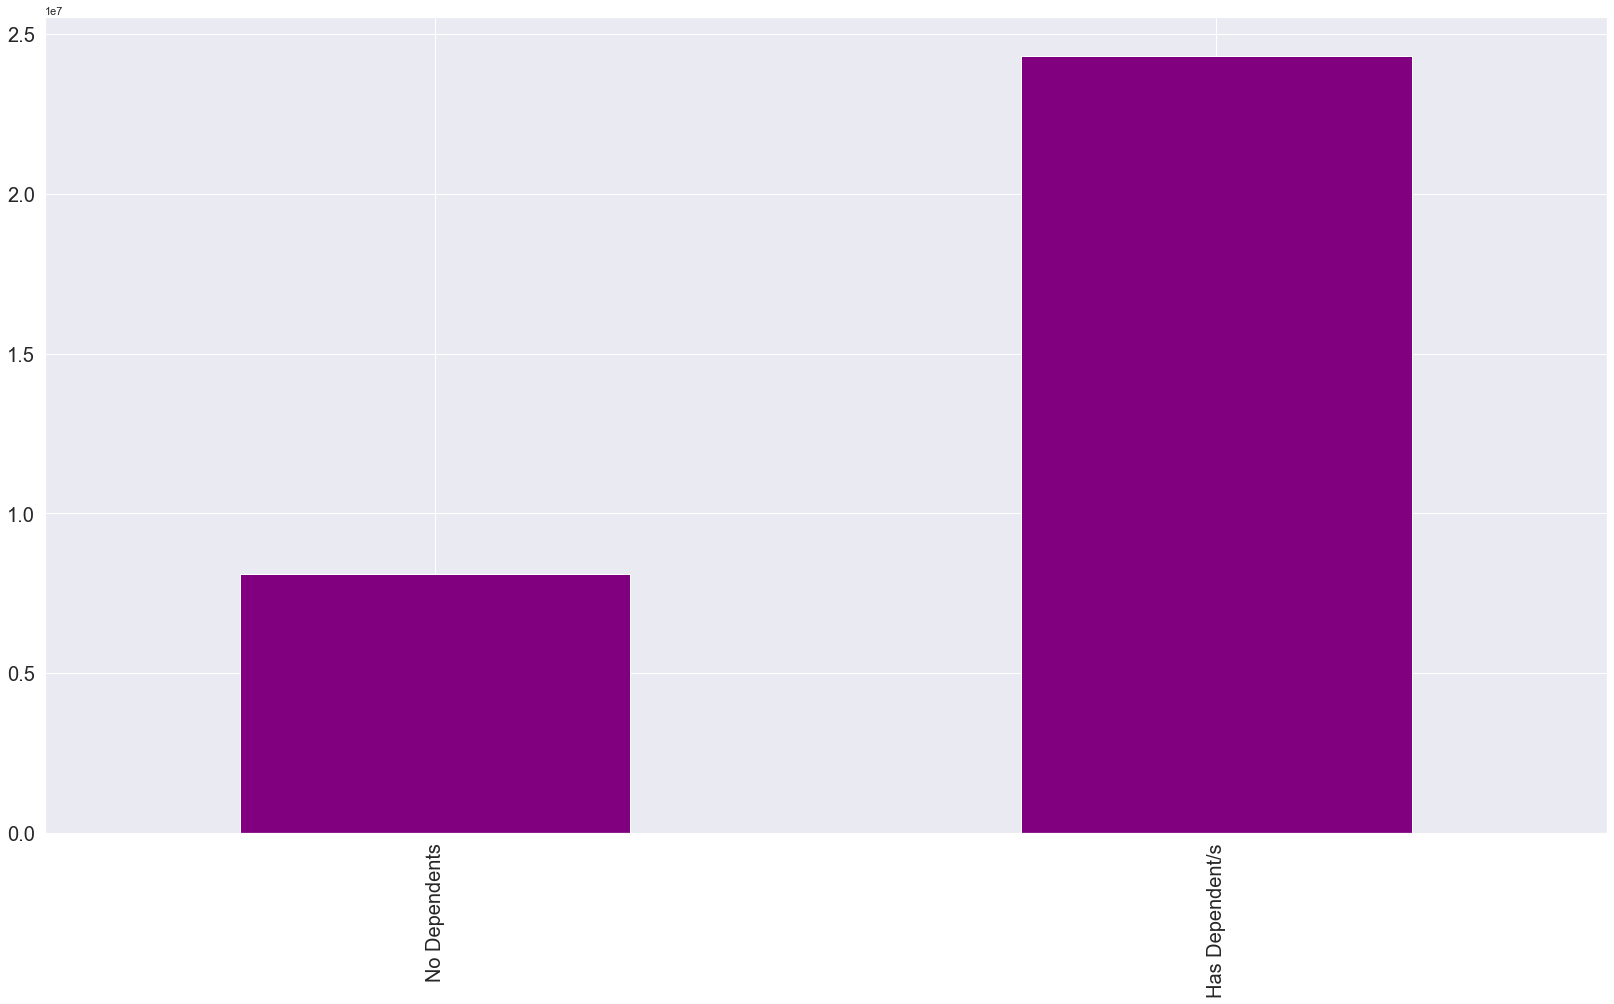

In [51]:
#bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar=df3['Dependent_flag'].value_counts().sort_values().plot.bar(color='purple', fontsize=20)

Most customers have dependents. 

In [52]:
#defining function to show labels on charts
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

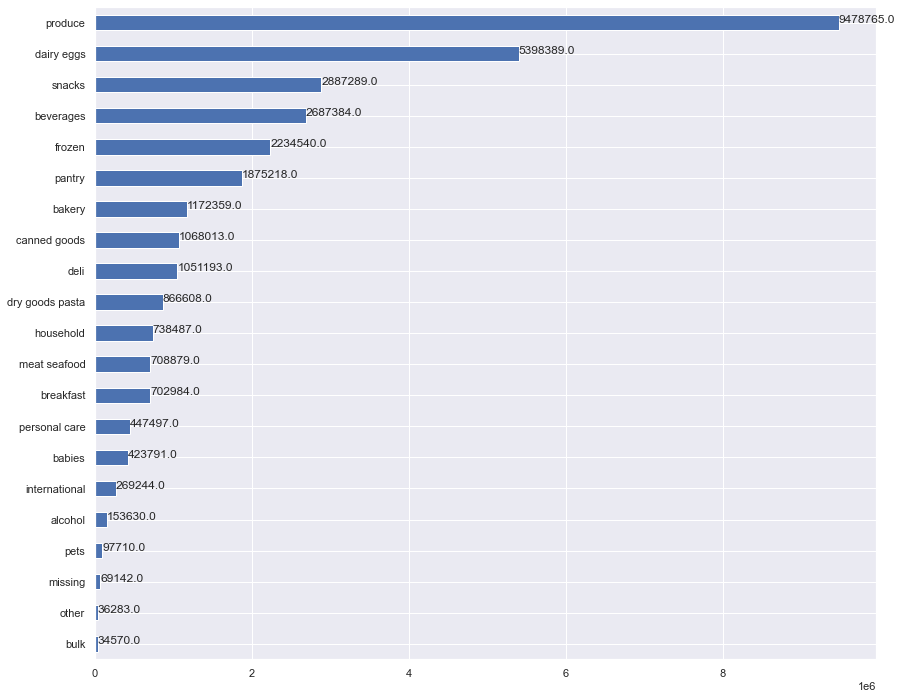

In [54]:
# bar chart showing the orders made for each department
department_bar=df3.department.value_counts().sort_values().plot(kind = 'barh', figsize=[14,12])
show_values(department_bar, "h", space=0)

The most orders have been placed from the produce department and the least from the bulk department. 

In [58]:
# creating subset with userid and loyalty columns
cust_loyalty=df3[['Customer_id','Loyalty_flag']]
# removing duplicate values
cust_loyalty_unique=cust_loyalty.drop_duplicates()

In [59]:
cust_loyalty_unique['Loyalty_flag'].value_counts()

New customer        111529
Regular customer     76864
Loyal customer       17017
Name: Loyalty_flag, dtype: int64

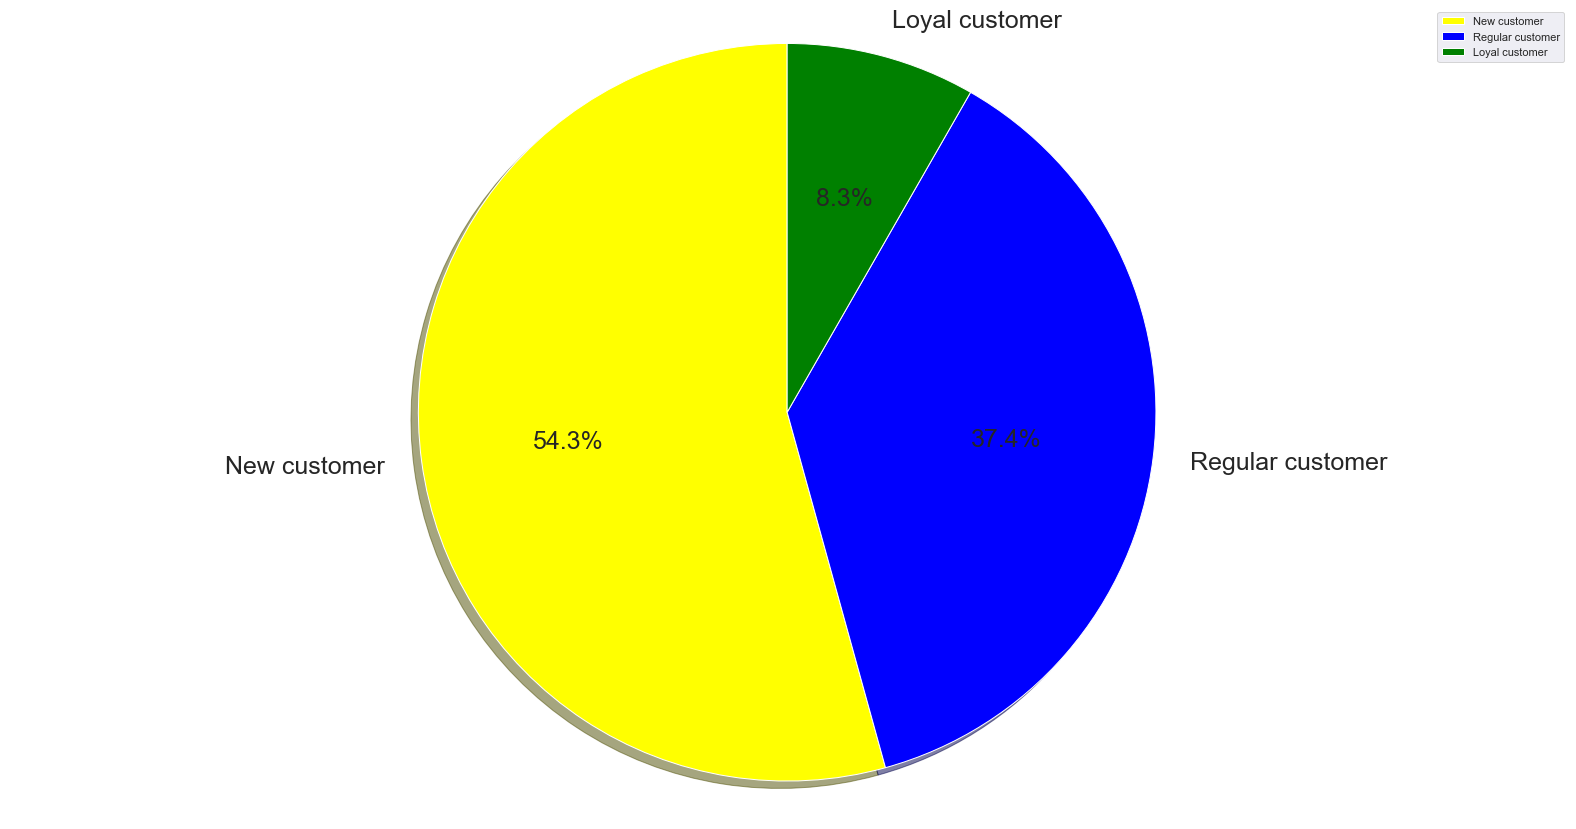

In [63]:
# pie chart for loyalty flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = cust_loyalty_unique['Loyalty_flag'].value_counts()
colors = ['yellow','blue','green']
textprops = {"fontsize":25}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()



# Exporting Final Data Set & Visualizations 

In [77]:
# exporting final dataset
df3.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final_dataset.pkl'))

In [84]:
# export loyalty Pie Chart 
loyal.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'loyal_dist_pie.png'))

In [85]:
# export department bar chart
department_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'department_bar.png'))

In [86]:
# export bar chart showing the amount of orders made by customers in each dependent flag
dependent_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'dependent_bar.png'))

In [87]:
# export bar chart showing the orders made by customers of each family status
marital_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'marital_bar.png'))

In [88]:
# export stacked bar chart for age groups and income groups
age_income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_income_stacked.png'))

In [89]:
# export bar chart for orders made by each income group
income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_bar.png'))

In [90]:
# export bar chart for orders made by each age group
age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_bar.png'))

In [94]:
# export stacked bar chart for income and region 
income_regional_dist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_regional_dist.png'))

In [95]:
# export regional distribution of customers
regional_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_regional_dist.png'))

In [100]:
# export bar graph displaying time of day when most orders are placed 
time_of_day_orders.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'time_of_day_orders.png'))